# SMS SPAM CLASSIFIER PROJECT 


## 1. Load Data

In [63]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("data/spam.csv", encoding ='ISO-8859-1' )

In [6]:
df.shape # 5572 lignes et 5 variables 

(5572, 5)

## 2. Cleaning data 


In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df.drop(["Unnamed: 2","Unnamed: 3", "Unnamed: 4"], axis = 1, inplace= True)

In [19]:
df.rename(columns = {"v1" : "target", "v2" : "text"}, inplace=True)

### Checking missing and duplicated values 

In [22]:
df.isna().sum() # Aucune valeurs manquantes 

target    0
text      0
dtype: int64

In [24]:
 df.duplicated().sum() #403 valeurs dupliquées 

403

In [25]:
df.drop_duplicates(inplace=True)

## 3. EDA

In [ ]:
df['target'].replace({"ham" : 0, "spam" : 1}, inplace = True)

([<matplotlib.patches.Wedge at 0x13ca72bf1d0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37%'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63%')])

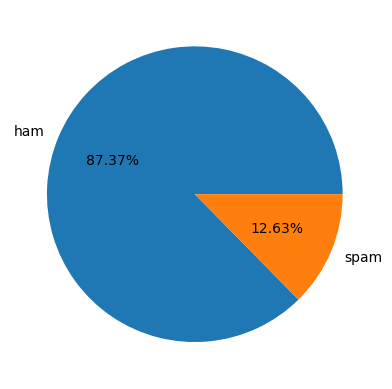

In [41]:
plt.pie(df['target'].value_counts(), autopct = '%1.2f%%', labels = ['ham', 'spam']) 

In [34]:
# Données déséquilibrées , il y a beaucoup plus de sms normaux que de spam

In [ ]:
#!pip install nltk

In [51]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
#Punkt est un segmenter de phrases basé sur des modèles statistiques. Il est utilisé pour diviser un texte en phrases ou en mots

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fares\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\fares\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

### Tokenisons les sms en créants des variables contenant le nombre de mot , de caractères etc ..


**Nombre de caractères**

In [48]:
df['num_characters'] = df['text'].apply(len)

In [49]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


**Nombre de mots**

In [52]:
df["num_words"] = df["text"].apply(lambda x :len(nltk.word_tokenize(x))) # prend un texte (x) en entrée et le divise en mots (appelés "tokens")

**Nombre de phrases**

In [54]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) # prend un texte (x) en entrée et le divise en phrases.

In [55]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


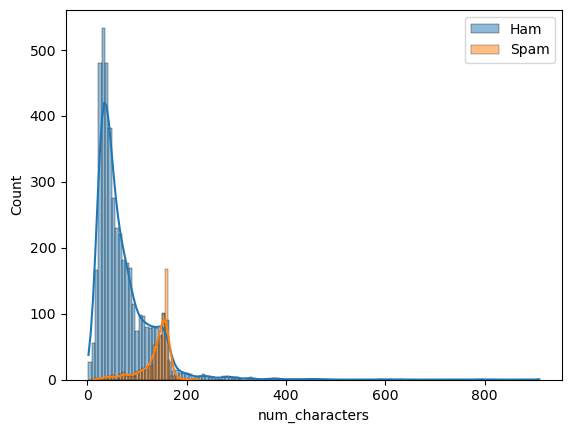

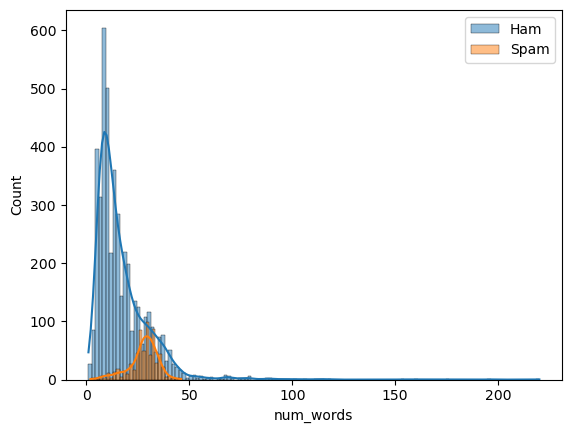

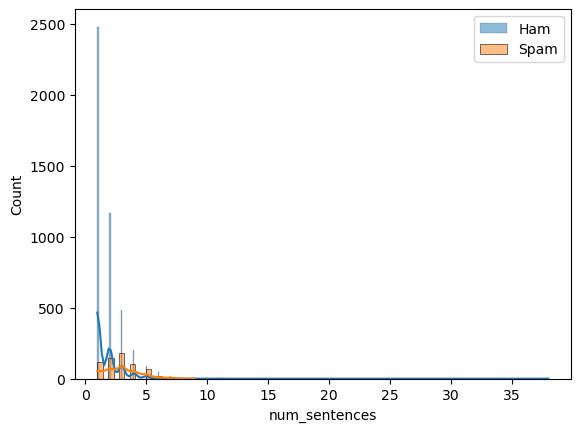

In [59]:
liste = ['num_characters', 'num_words', 'num_sentences']
for element in liste : 
    plt.figure()
    sns.histplot(data = df, x = df[element][df['target'] == 0], kde = True, label = 'Ham')
    sns.histplot(data = df, x = df[element][df['target'] == 1], kde = True, label = 'Spam')
    plt.legend()

On remarque qu'il y a bien une différence de distribution entre les différentes variables en fonction que le sms soit normal ou un spam.
Globalement un sms classé de spam contient + de mots, + de caractères (liés), et + de phrases 

In [64]:
df_numeric = df.select_dtypes(np.number)

<Axes: >

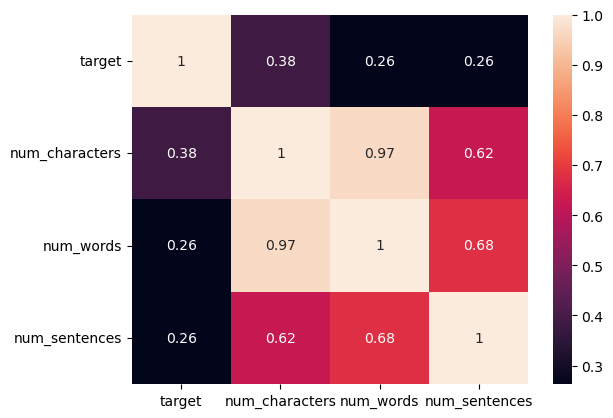

In [65]:
corr = df_numeric.corr()
sns.heatmap(corr, annot = True)

Grosse corrélation entre le nombre de caractères et le nombre de mots ce qui est logique. Il serait judicieux de garder une seule variable vu qu'ils sont très corrélés

## 4. Data Preprocessing 
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [66]:
from nltk.corpus import stopwords #Permet de récupérer les stopword qui sont mots courants dans une langue (comme "the", "is", "in" en anglais)
# Ils sont souvent supprimés car ils n'importent pas vraiment de valeur et de sens.
nltk.download('stopwords')
stopwords.words('english')
import string
string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fares\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [67]:
df['text'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

In [68]:
def transform_text(text) : 
    #Mettre le texte en minuscule 
    text = text.lower()
    #Récupérer la liste de mot du texte avec nltk word tokenize
    text = nltk.word_tokenize(text)

    y = []
    for t in text : 
        if t.isalnum() :  # On check si le mot est soit alphabetique, soit numerique
            y.append(t)
    text = y[:] # On garde tous les mots (sans les espaces)
    y.clear()
    #On regarde maintenant dans les mots récupérés si il y a des stopwords ou des ponctuations 
    for t in text :
        if t not in stopwords.words('english') and t not in string.punctuation : 
            y.append(t)
    text = y[:]
    y.clear()
    for t in text : 
        y.append(ps.stem(t)) # Stemming : mettre les mots dérivées sous leur forme de racine ( par exemple running, ran, runner --> run)

    return " ".join(y) #permet d'afficher notre liste de mots en une "phrase" en séparant les mots de la liste par un espace
        
        

In [70]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [78]:
df['transformed_text'] = df['text'].apply(transform_text) 

In [79]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


On peut s'intéresser à la fréquence des mots dans les sms 

In [81]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [82]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")) # concatène les différents mots en une longue phrase en spécifiant que ceux ci sont séparés par une virgule

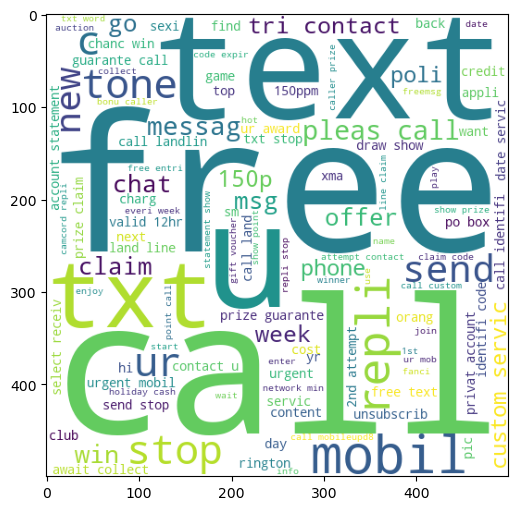

In [83]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

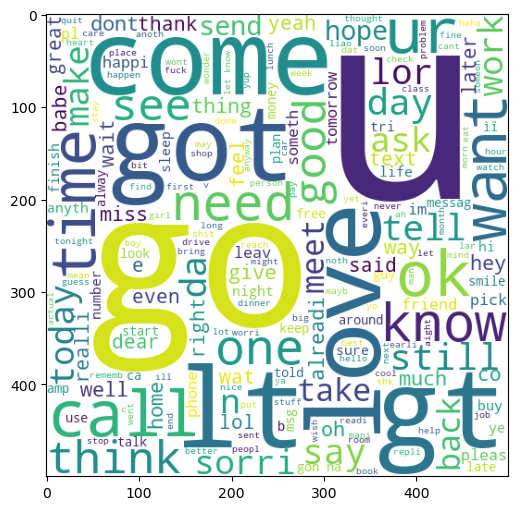

In [84]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")) # concatène les différents mots en une longue phrase en spécifiant que ceux ci sont séparés par une virgule
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [93]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist() : 
    for words in msg.split() : 
        spam_corpus.append(words)

In [90]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist() : 
    for words in msg.split() : 
        ham_corpus.append(words)

**On peut visualiser les 30 mots les plus courants pour les spams et les non spams**


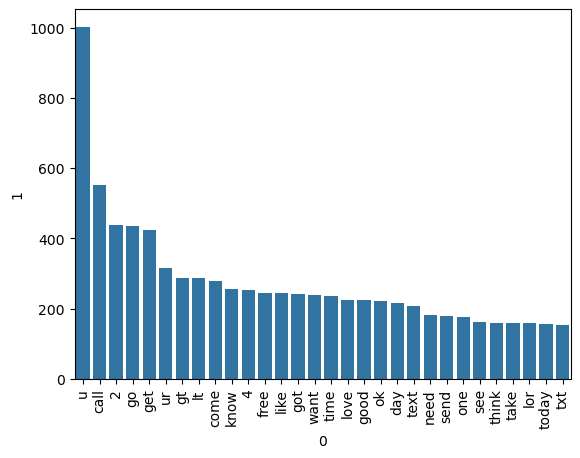

In [91]:
from collections import Counter # utilisée pour compter les occurrences des éléments dans un iterable (comme une liste de mots).
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [92]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

KeyError: 0